In [1]:
from tifffile import TiffFile
import os
import numpy as np
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import utilities as rocku
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [4]:
# need to change
ipts="23768"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'alignment_calibration'

In [5]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['06_29_21_OB',
 '06_29_21_dark_field',
 '20200618_INL_mask_8dot2mm_alignment_RotSmall2_22:53:53.csv',
 '2021_01_04_resolution',
 '2021_02_25',
 '2021_03_25',
 '2021_04_14',
 '2021_04_15',
 '2021_04_17',
 '2021_04_18',
 '2021_04_18_resolution',
 '2021_04_22',
 '2021_04_22_BN_PLA',
 '2021_04_27_light',
 '2021_05_25',
 '2021_06_11_beam_size',
 '2021_06_11_zeiss_focus',
 '2021_06_14_furnace_position',
 '2021_07_01',
 '2021_07_01_metals',
 '2021_07_07_Cu_fastCT',
 '2021_07_07_sCMOS_fastCT_test_RBV',
 '2021_07_07_sCMOS_focus',
 '2021_07_07_sCMOS_resolution',
 '2021_09_04_mono_test',
 '2021_09_21_NewCCD_test',
 '2021_09_22',
 '2022_01_04_flux',
 '2022_01_04_resolution',
 '2022_01_06_chopper',
 '2022_01_11_realign_detector',
 '2022_01_13_HEA_CT',
 '2022_01_13_neutron_eater',
 '2022_01_14_light_tightness',
 '2022_01_26_focus_zeiss',
 '2022_04_05_ob',
 '2022_09_29_startup',
 '2022_11_08_QHY_closing_slits',
 '2022_11_08_QHY_lighttight',
 '2022_11_08_light_tight_check',
 '2023_05_23_QHYS',
 '2023

In [18]:
# sample_name = "2024_07_01_pinhole_scan_60s"
sample_name = "2024_07_02_pinhole_11mm_BN_hori_scan_60s"
# sample_name = "2024_07_02_moving_pinhole_11mm_BN_hori_scan_60s"
# sample_name = "2024_07_02_moving_pinhole_11mm_BN_verti_scan_60s"
scan_dir = os.path.join(scan_loc, sample_name)

In [19]:
fname_list = os.listdir(scan_dir)
# fname_list.remove('OB_0060_4414.tiff')
fname_list.sort()
fname_list

['scan00_all_205.000_8.000_0060_5127.tiff',
 'scan00_all_205.500_8.500_0060_5126.tiff',
 'scan00_all_206.000_9.000_0060_5125.tiff',
 'scan00_all_206.500_9.500_0060_5124.tiff',
 'scan00_all_207.000_10.000_0060_5123.tiff',
 'scan00_all_207.500_10.500_0060_5122.tiff',
 'scan00_all_208.000_11.000_0060_5121.tiff',
 'scan00_all_208.500_11.500_0060_5120.tiff',
 'scan00_all_209.000_12.000_0060_5119.tiff',
 'scan00_all_209.500_12.500_0060_5118.tiff',
 'scan00_all_210.000_13.000_0060_5117.tiff',
 'scan00_all_210.500_13.500_0060_5116.tiff',
 'scan00_all_211.000_14.000_0060_5115.tiff',
 'scan00_all_211.500_14.500_0060_5114.tiff',
 'scan00_all_212.000_15.000_0060_5113.tiff',
 'scan00_all_212.500_15.500_0060_5112.tiff',
 'scan00_all_213.000_16.000_0060_5111.tiff',
 'scan00_all_213.500_16.500_0060_5110.tiff',
 'scan00_all_214.000_17.000_0060_5109.tiff',
 'scan00_all_214.500_17.500_0060_5108.tiff',
 'scan00_all_215.000_18.000_0060_5107.tiff',
 'scan00_all_215.500_18.500_0060_5106.tiff',
 'scan00_all_2

In [14]:
lookup_tags = ['BMCounterRate', 'BMCounter', 'MotAperture', 'MotHoriTrans', 'MotVertTrans', 'ExposureTime']
meta_dict = {}
for e_tif in fname_list:
    meta_dict[e_tif] = {}
    with TiffFile(os.path.join(scan_dir, e_tif)) as tif:
        for page in tif.pages:
            for tag in page.tags:
                tag_name, tag_value = tag.name, tag.value
                if type(tag_value) == str and ':' in tag_value:
                    tag_name = tag_value.split(':')[0]
                    tag_value = tag_value.split(':')[1]
                if tag_name in lookup_tags:
                    meta_dict[e_tif][tag_name] = float(tag_value)
#                 print("NAME:", tag_name)
#                 print("VALUE:", tag_value)
meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
meta_df['Rate'] = meta_df['BMCounter']/meta_df['ExposureTime']
meta_df['Neutrons'] = meta_df['Rate']/(rocku.BM_eff*(2.5/rocku.BM_eff_wave))

Text(0.5, 1.0, 'Pinhole aperture scan (fixed BN mask)')

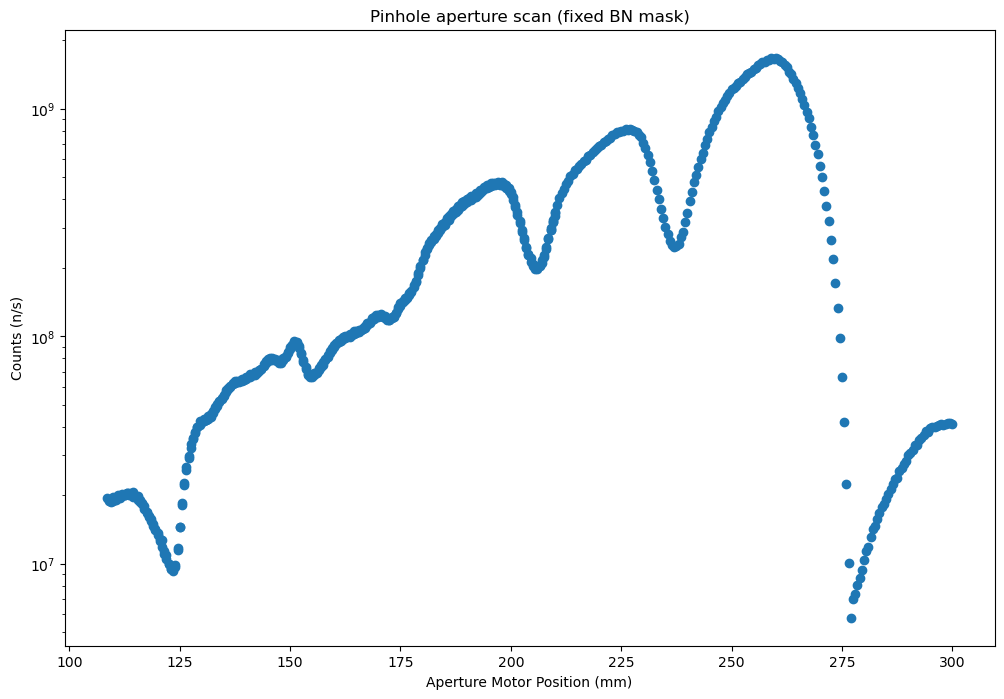

In [36]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotAperture'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("Aperture Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole aperture scan (fixed BN mask)")

Text(0.5, 1.0, 'Pinhole with BN mask scan')

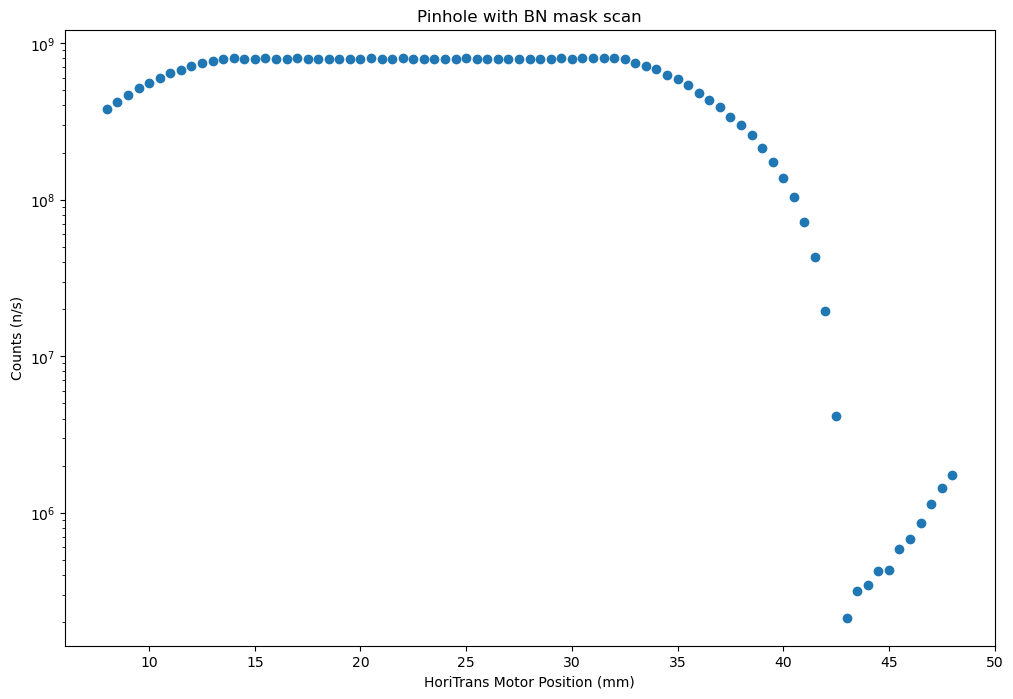

In [32]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotHoriTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("HoriTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole with BN mask scan")

Text(0.5, 1.0, 'Pinhole with BN mask scan')

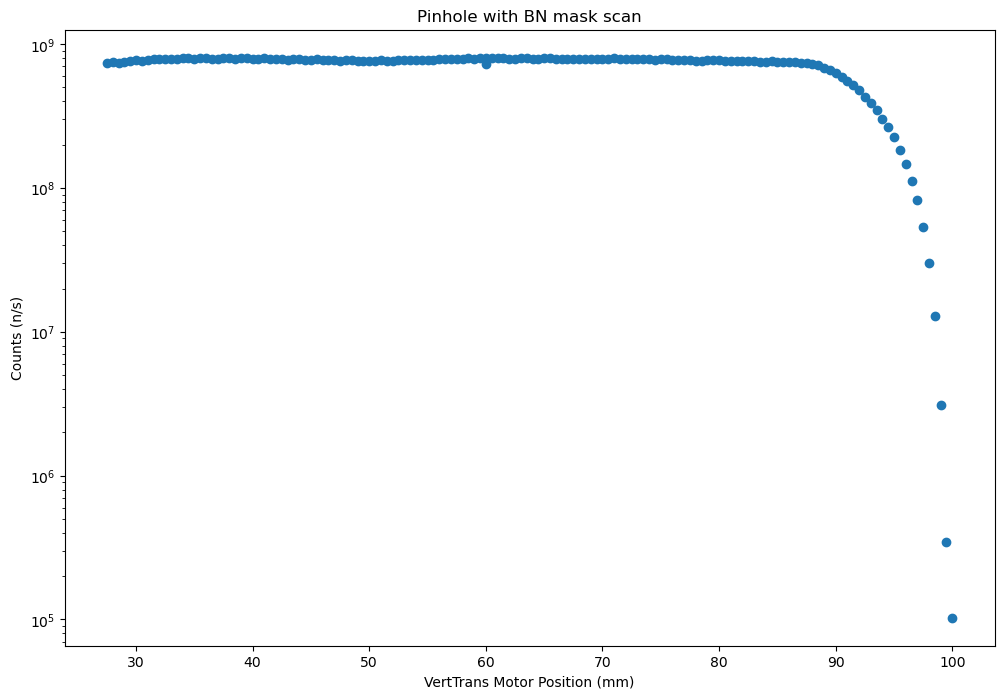

In [15]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotVertTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("VertTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("Pinhole with BN mask scan")

Text(0.5, 1.0, 'BN mask HoriTrans scan (fixed pinhole)')

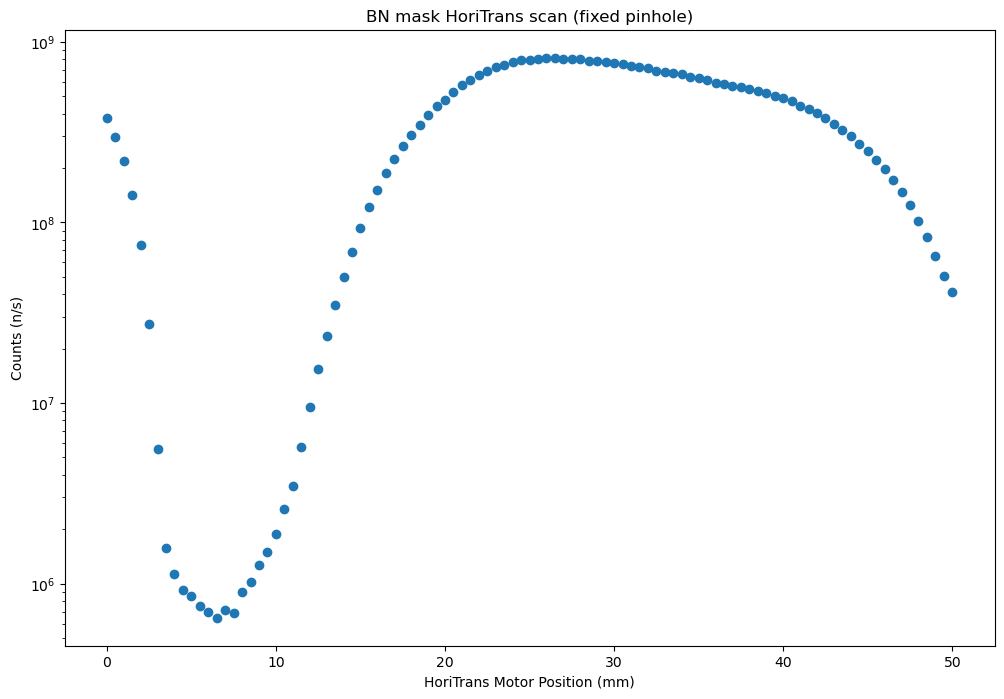

In [10]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotHoriTrans'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['Rate'])  # Plot some data on the Axes.
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
plt.xlabel("HoriTrans Motor Position (mm)")
plt.ylabel("Counts (n/s)")
plt.title("BN mask HoriTrans scan (fixed pinhole)")

In [90]:
pprint(meta_dict)

{'scan00_all_108.500_0060_4842.tiff': {'BMCounter': 12257.0,
                                       'BMCounterRate': 224.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 108.5},
 'scan00_all_109.000_0060_4841.tiff': {'BMCounter': 11890.0,
                                       'BMCounterRate': 218.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 109.0},
 'scan00_all_109.500_0060_4840.tiff': {'BMCounter': 11846.0,
                                       'BMCounterRate': 222.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 109.5},
 'scan00_all_110.000_0060_4839.tiff': {'BMCounter': 12400.0,
                                       'BMCounterRate': 197.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 110.0},
 'scan00_all

 'scan00_all_257.500_0060_4544.tiff': {'BMCounter': 1016458.0,
                                       'BMCounterRate': 16519.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 257.5},
 'scan00_all_258.000_0060_4543.tiff': {'BMCounter': 1035222.0,
                                       'BMCounterRate': 16560.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 258.0},
 'scan00_all_258.500_0060_4542.tiff': {'BMCounter': 1034672.0,
                                       'BMCounterRate': 16706.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 258.5},
 'scan00_all_259.000_0060_4541.tiff': {'BMCounter': 1053252.0,
                                       'BMCounterRate': 16775.0,
                                       'ExposureTime': 60.0,
                                       'MotAperture': 259.

In [91]:
meta_df

,ExposureTime,MotAperture,BMCounter,BMCounterRate,Rate,Neutrons
scan00_all_108.500_0060_4842.tiff,60.0,108.5,12257.0,224.0,204.283333,1.937866e+07
scan00_all_109.000_0060_4841.tiff,60.0,109.0,11890.0,218.0,198.166667,1.879842e+07
scan00_all_109.500_0060_4840.tiff,60.0,109.5,11846.0,222.0,197.433333,1.872885e+07
scan00_all_110.000_0060_4839.tiff,60.0,110.0,12400.0,197.0,206.666667,1.960474e+07
scan00_all_110.500_0060_4838.tiff,60.0,110.5,12131.0,191.0,202.183333,1.917945e+07
...,...,...,...,...,...,...
scan02_smalls_208.000_0120_4850.tiff,120.0,208.0,307328.0,2485.0,2561.066667,2.429470e+08
scan02_smalls_208.500_0120_4849.tiff,120.0,208.5,338766.0,2765.0,2823.050000,2.677992e+08
scan02_smalls_209.000_0120_4848.tiff,120.0,209.0,371347.0,3153.0,3094.558333,2.935549e+08
scan02_smalls_209.500_0120_4847.tiff,120.0,209.5,401520.0,3390.0,3346.000000,3.174071e+08


In [75]:
# for each in meta_dict.keys():
#     _dia = each.split('_')[1]
#     _dia = float(_dia.replace('mm', ''))
#     meta_dict[each]['Aperture_dia_mm'] = _dia

In [81]:
# meta_df['Area'] = 3.14159265 * (meta_df['Aperture_dia_mm']/2)**2

In [82]:
# meta_df['Neutrons_per_area'] = meta_df['Neutrons']/meta_df['Area']

Text(0, 0.5, 'Flux (n/s)')

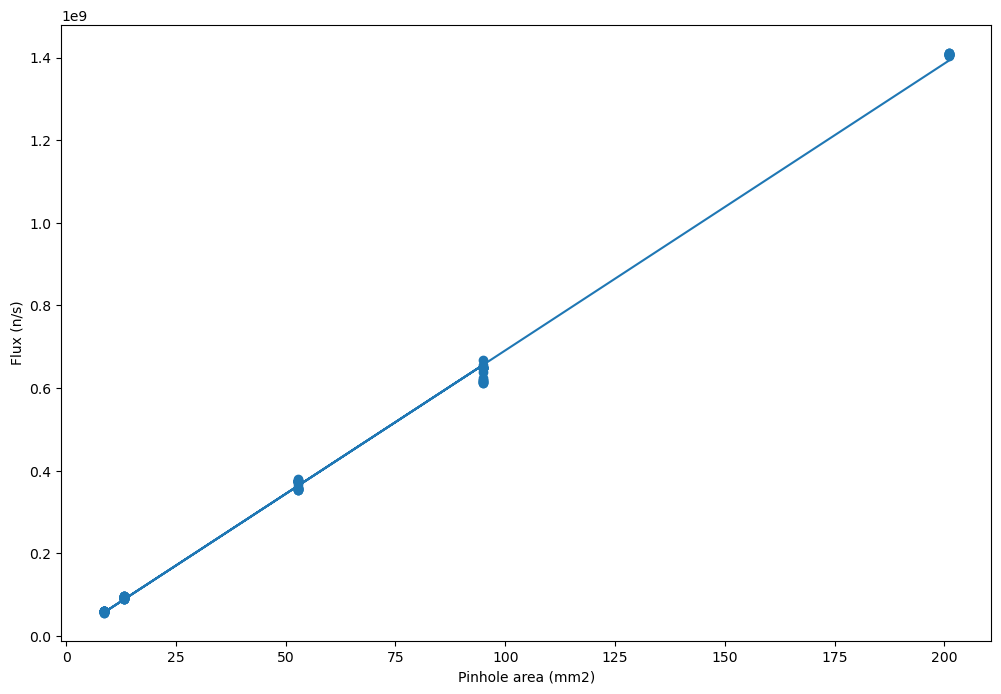

In [33]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['Area'], meta_df['Neutrons'])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   
#calculate equation for trendline
z = np.polyfit(meta_df['Area'], meta_df['Neutrons'], 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(meta_df['Area'], p(meta_df['Area']))
plt.xlabel("Pinhole area (mm2)")
plt.ylabel("Flux (n/s)")

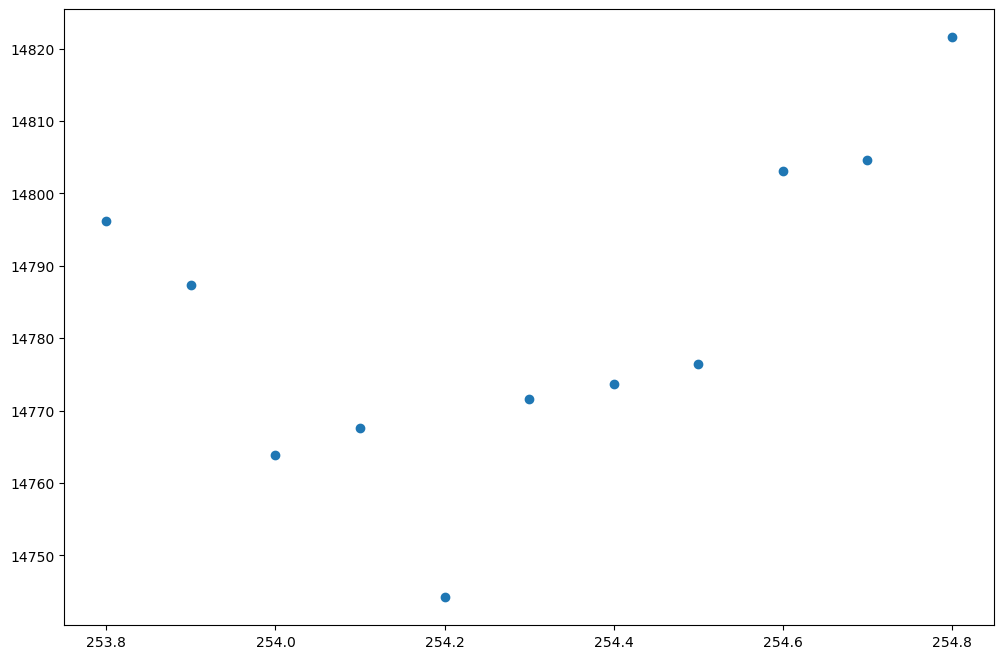

In [34]:
pinhole_size = [16, 11, 8.2, 4.1, 3.3]
pinhole_size = 16
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

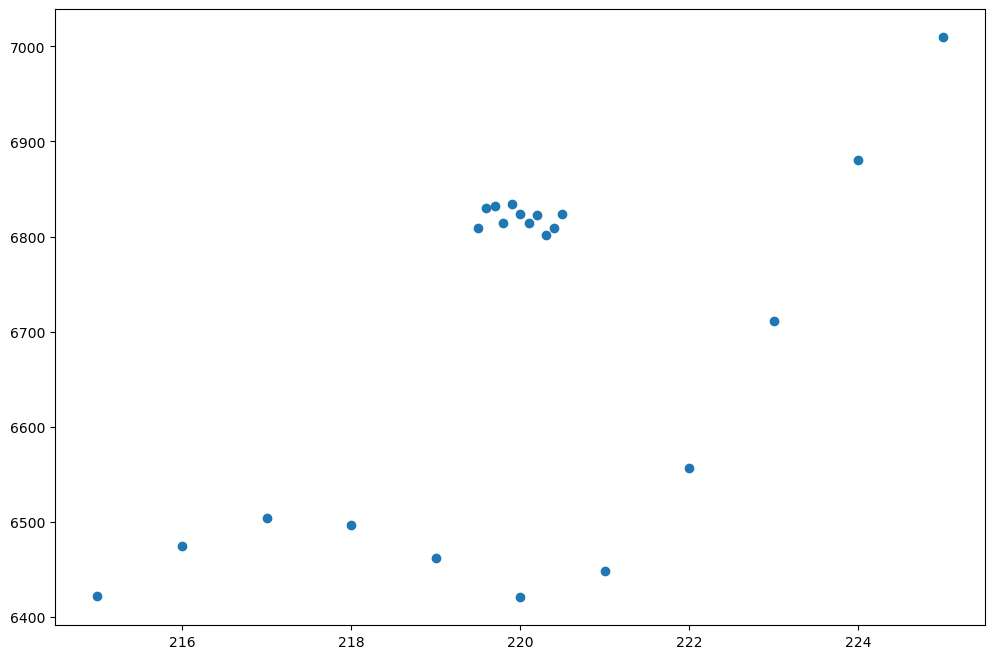

In [35]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 11
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

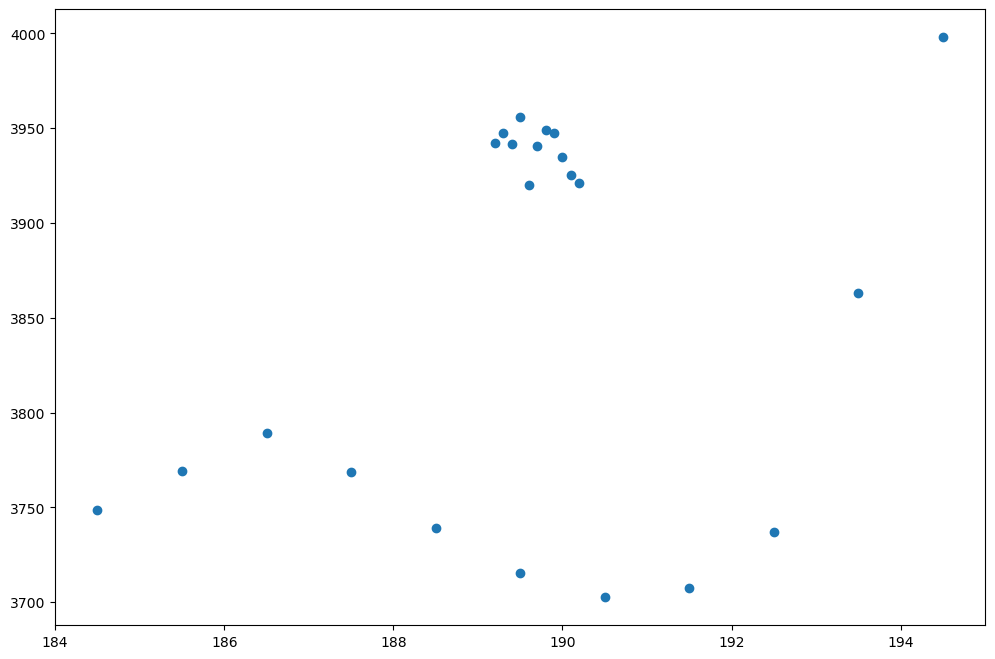

In [36]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 8.2
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

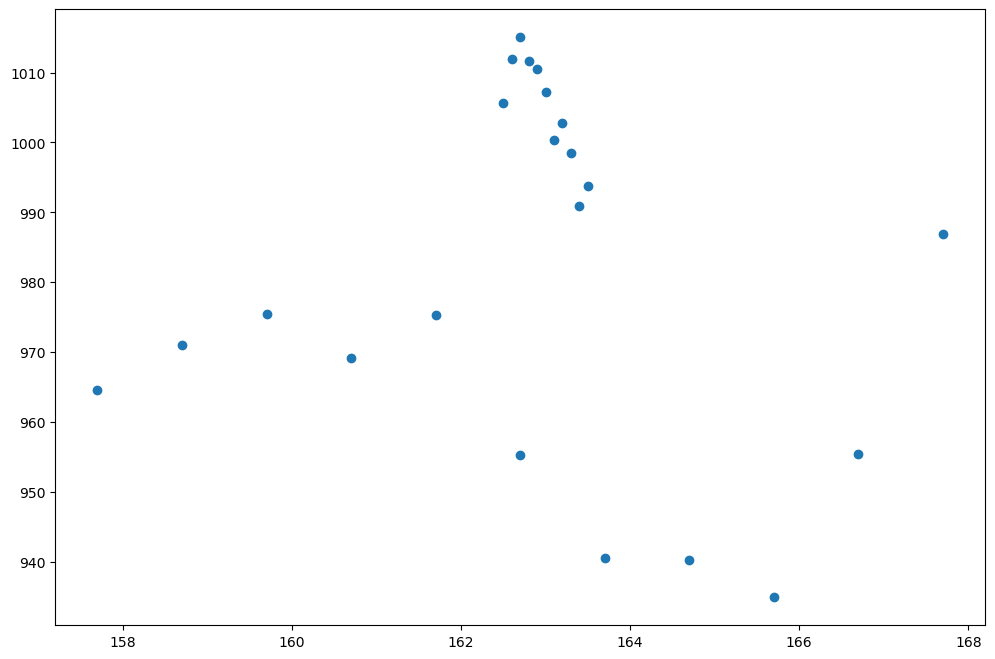

In [37]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 4.1
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

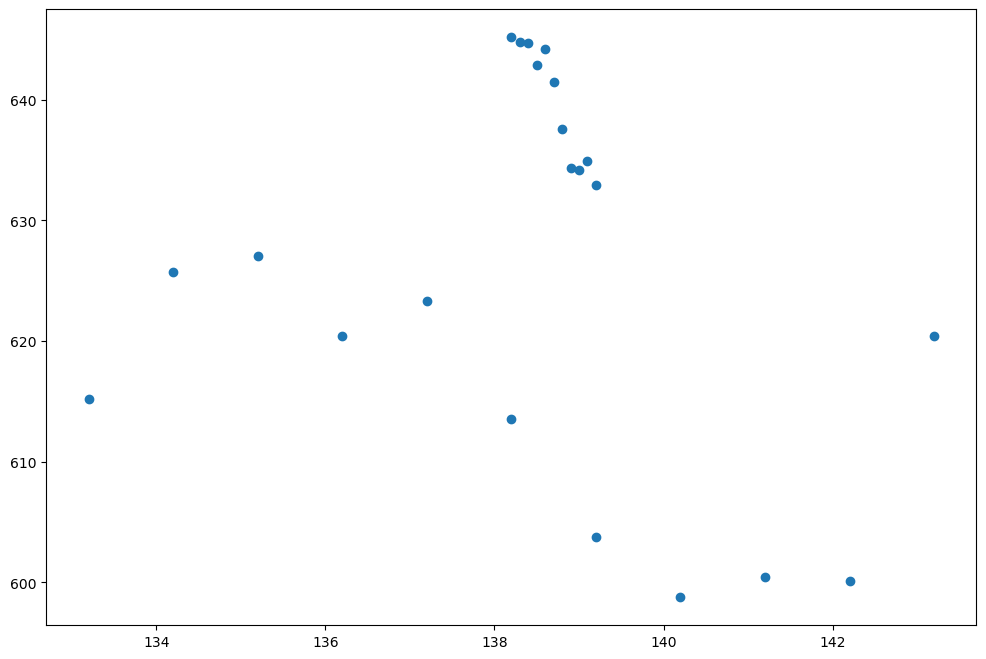

In [38]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
# ax.scatter(meta_df['MotAperture'], meta_df['BMCounterRate'], )  # Plot some data on the Axes.
pinhole_size = 3.3
ax.scatter(meta_df['MotAperture'][meta_df['Aperture_dia_mm']==pinhole_size], meta_df['Rate'][meta_df['Aperture_dia_mm']==pinhole_size])  # Plot some data on the Axes.
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.show()   

In [63]:
meta_df.to_csv('test')